In [29]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

import datetime, warnings, scipy
warnings.filterwarnings("ignore")

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout , BatchNormalization
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras

In [26]:
pip install keras


Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install tensorflow


  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=ebd8996e665057135a218b742385b0dd8fb5648b9af1b855efd507c006dd4233
  Stored in directory: c:\users\ipeek\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=78da77cac208f8bcf036deefe6d4a5768060c18196f6b8dd64e2f2861c23157a
  Stored in directory: c:\users\ipeek\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
Successfully built termcolor wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.11.2
    Uninstalling wrapt-1.11.2:
      Successfully uninstalled wrapt-1.11.2
  Attempting uninstall: h5py
    Found existing installation: h5py 2.10.0
    Uninstalling h5py-2.10.0:
      Successfully uninstalled h5py-2.10.0


In [2]:
data = pd.read_csv("FinalData.csv")

In [4]:
data.head()

,Unnamed: 0,flightid,day_of_month,day_of_week,origin,dest,dep_time,dep_del15,dep_time_blk,arr_time,arr_del15,distance,origin_airport,dest_airport,op_carrier_airline,year,dep_time_blkSTART,dep_time_blkEND,deptTIME,arrivalTime,dtBLKstart,dtBLKend,dept_time_indicator,dept_code,sched_dept,FLight Status,flight_Status
0,0,1,1,2,GNV,ATL,601,0,0600-0659,722,0,300,Gainesville Regional Airport,Hartsfield–Jackson Atlanta International Airport,Endeavor Air,2019,600,659,06:01,07:22,06:00,06:59,1,ON TIME,06:01,1,1
1,1,2,1,2,MSP,CVG,1359,0,1400-1459,1633,0,596,Minneapolis–Saint Paul International Airport (...,Cincinnati/Northern Kentucky International Air...,Endeavor Air,2019,1400,1459,13:59,16:33,14:00,14:59,-1,EARLY,14:00,0,0
2,2,3,1,2,DTW,CVG,1215,0,1200-1259,1329,0,229,Detroit Metropolitan Wayne County Airport,Cincinnati/Northern Kentucky International Air...,Endeavor Air,2019,1200,1259,12:15,13:29,12:00,12:59,15,ON TIME,12:15,1,1
3,3,4,1,2,TLH,ATL,1521,0,1500-1559,1625,0,223,Tallahassee International Airport,Hartsfield–Jackson Atlanta International Airport,Endeavor Air,2019,1500,1559,15:21,16:25,15:00,15:59,21,ON TIME,15:21,1,1
4,4,5,1,2,ATL,FSM,1847,0,1900-1959,1940,0,579,Hartsfield–Jackson Atlanta International Airport,Fort Smith Regional Airport,Endeavor Air,2019,1900,1959,18:47,19:40,19:00,19:59,-13,EARLY,19:00,0,0


In [47]:
include = [ 'dept_time_indicator','distance','flight_Status','op_carrier_airline','origin']

data1 = data[include]
data1.head()

,dept_time_indicator,distance,flight_Status,op_carrier_airline,origin
0,1,300,1,Endeavor Air,GNV
1,-1,596,0,Endeavor Air,MSP
2,15,229,1,Endeavor Air,DTW
3,21,223,1,Endeavor Air,TLH
4,-13,579,0,Endeavor Air,ATL


In [ ]:
categoricals = 

In [48]:
df_ohe = pd.get_dummies(data1, columns=['op_carrier_airline','origin'])
df_ohe.head(10)

,dept_time_indicator,distance,flight_Status,"op_carrier_airline_Alaska Airlines, Inc.",op_carrier_airline_Allegiant Air,op_carrier_airline_American Airlines,op_carrier_airline_American Eagle Airlines,op_carrier_airline_Atlantic Southeast Airlines,op_carrier_airline_Comair,op_carrier_airline_Delta Air Lines,op_carrier_airline_Endeavor Air,op_carrier_airline_Frontier Airlines,op_carrier_airline_Hawaiian Airlines,op_carrier_airline_JetBlue Airways,op_carrier_airline_Mesa Airlines,op_carrier_airline_Midwest Airlines,op_carrier_airline_SkyWest Airlines,op_carrier_airline_Southwest Airlines,op_carrier_airline_Spirit Airlines,op_carrier_airline_United Airlines,origin_ABE,origin_ABI,origin_ABQ,origin_ABR,origin_ABY,origin_ACT,origin_ACV,origin_ACY,origin_ADK,origin_ADQ,origin_AEX,origin_AGS,origin_ALB,origin_ALO,origin_AMA,origin_ANC,origin_APN,origin_ART,origin_ASE,origin_ATL,origin_ATW,origin_ATY,origin_AUS,origin_AVL,origin_AVP,origin_AZA,origin_AZO,origin_BDL,origin_BET,origin_BFF,origin_BFL,origin_BFM,origin_BGM,origin_BGR,origin_BHM,origin_BIL,origin_BIS,origin_BJI,origin_BLI,origin_BLV,origin_BMI,origin_BNA,origin_BOI,origin_BOS,origin_BPT,origin_BQK,origin_BQN,origin_BRD,origin_BRO,origin_BRW,origin_BTM,origin_BTR,origin_BTV,origin_BUF,origin_BUR,origin_BWI,origin_BZN,origin_CAE,origin_CAK,origin_CDC,origin_CDV,origin_CGI,origin_CHA,origin_CHO,origin_CHS,origin_CID,origin_CIU,origin_CKB,origin_CLE,origin_CLL,origin_CLT,origin_CMH,origin_CMI,origin_CMX,origin_CNY,origin_COD,origin_COS,origin_COU,origin_CPR,origin_CRP,origin_CRW,origin_CSG,origin_CVG,origin_CWA,origin_CYS,origin_DAB,origin_DAL,origin_DAY,origin_DBQ,origin_DCA,origin_DEN,origin_DFW,origin_DHN,origin_DLH,origin_DRO,origin_DRT,origin_DSM,origin_DTW,origin_DVL,origin_EAR,origin_EAU,origin_ECP,origin_EGE,origin_EKO,origin_ELM,origin_ELP,origin_ERI,origin_ESC,origin_EUG,origin_EVV,origin_EWN,origin_EWR,origin_EYW,origin_FAI,origin_FAR,origin_FAT,origin_FAY,origin_FCA,origin_FLG,origin_FLL,origin_FNT,origin_FSD,origin_FSM,origin_FWA,origin_GCC,origin_GCK,origin_GEG,origin_GFK,origin_GGG,origin_GJT,origin_GNV,origin_GPT,origin_GRB,origin_GRI,origin_GRK,origin_GRR,origin_GSO,origin_GSP,origin_GTF,origin_GTR,origin_GUC,origin_GUM,origin_HDN,origin_HGR,origin_HHH,origin_HIB,origin_HLN,origin_HNL,origin_HOB,origin_HOU,origin_HPN,origin_HRL,origin_HSV,origin_HTS,origin_HVN,origin_HYS,origin_IAD,origin_IAG,origin_IAH,origin_ICT,origin_IDA,origin_ILM,origin_IMT,origin_IND,origin_INL,origin_ISN,origin_ISP,origin_ITH,origin_ITO,origin_JAC,origin_JAN,origin_JAX,origin_JFK,origin_JLN,origin_JMS,origin_JNU,origin_KOA,origin_KTN,origin_LAN,origin_LAR,origin_LAS,origin_LAW,origin_LAX,origin_LBB,origin_LBE,origin_LBF,origin_LBL,origin_LCH,origin_LCK,origin_LEX,origin_LFT,origin_LGA,origin_LGB,origin_LIH,origin_LIT,origin_LNK,origin_LRD,origin_LSE,origin_LWB,origin_LWS,origin_LYH,origin_MAF,origin_MBS,origin_MCI,origin_MCO,origin_MDT,origin_MDW,origin_MEI,origin_MEM,origin_MFE,origin_MFR,origin_MGM,origin_MHK,origin_MHT,origin_MIA,origin_MKE,origin_MKG,origin_MLB,origin_MLI,origin_MLU,origin_MMH,origin_MOB,origin_MOT,origin_MQT,origin_MRY,origin_MSN,origin_MSO,origin_MSP,origin_MSY,origin_MTJ,origin_MYR,origin_OAJ,origin_OAK,origin_OGD,origin_OGG,origin_OGS,origin_OKC,origin_OMA,origin_OME,origin_ONT,origin_ORD,origin_ORF,origin_ORH,origin_OTH,origin_OTZ,origin_OWB,origin_PAE,origin_PAH,origin_PBG,origin_PBI,origin_PDX,origin_PGD,origin_PHF,origin_PHL,origin_PHX,origin_PIA,origin_PIB,origin_PIE,origin_PIH,origin_PIR,origin_PIT,origin_PLN,origin_PNS,origin_PPG,origin_PRC,origin_PSC,origin_PSE,origin_PSG,origin_PSM,origin_PSP,origin_PUB,origin_PVD,origin_PVU,origin_PWM,origin_RAP,origin_RDD,origin_RDM,origin_RDU,origin_RFD,origin_RHI,origin_RIC,origin_RIW,origin_RKS,origin_RNO,origin_ROA,origin_ROC,origin_ROW,origin_RST,origin_RSW,origin_SAF,origin_SAN,origin_SAT,origin_SAV,origin_SBA,origin_SBN,origin_SBP,origin_SCC,origin_SCE,origin_SCK,origin_SDF,origin_SEA,origin_SFB,origin_SFO,origi

In [49]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Columns: 373 entries, dept_time_indicator to origin_YUM
dtypes: int64(3), uint8(370)
memory usage: 394.0 MB


In [35]:
df_ohe.to_csv('modeldatafin.csv')

In [46]:
df_ohe1 = pd.read_csv('modeldatafin.csv')


df_ohe1.drop('Unnamed: 0')

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [61]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('LOSS', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('ACCURACY', fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.show()

In [17]:
def conf_matrix(conf_mat):
    
    conf_mat = pd.DataFrame(conf_mat, index = ['0', '1'], columns = ['0', '1'])
    sns.set(font_scale=1.4)
    plt.figure(figsize = (8,7))
    sns.heatmap(conf_mat, cmap= "Blues", linecolor = 'black' , linewidth = 1, annot = True, fmt='')
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('True', fontsize=14)
    plt.show()

In [18]:
def model_metrics(a, b):
    
    accuracy = metrics.accuracy_score(a, b)
    precision = precision_score(a, b)
    recall = recall_score(a, b)
    f1 = f1_score(a, b)

    print('Accuracy:', round(accuracy*100, 2),'%')
    print('Precision score:', round(precision*100, 2),'%')
    print('Recall score:', round(recall*100, 2),'%')
    print('F1 score:', round(f1*100, 2),'%')

In [31]:
y = df_ohe['flight_Status']
X = df_ohe.drop(['flight_Status'], axis=1)

In [32]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: flight_Status, dtype: int64

In [33]:
X.head()

,dept_time_indicator,distance,"op_carrier_airline_Alaska Airlines, Inc.",op_carrier_airline_Allegiant Air,op_carrier_airline_American Airlines,op_carrier_airline_American Eagle Airlines,op_carrier_airline_Atlantic Southeast Airlines,op_carrier_airline_Comair,op_carrier_airline_Delta Air Lines,op_carrier_airline_Endeavor Air,op_carrier_airline_Frontier Airlines,op_carrier_airline_Hawaiian Airlines,op_carrier_airline_JetBlue Airways,op_carrier_airline_Mesa Airlines,op_carrier_airline_Midwest Airlines,op_carrier_airline_SkyWest Airlines,op_carrier_airline_Southwest Airlines,op_carrier_airline_Spirit Airlines,op_carrier_airline_United Airlines,origin_ABE,origin_ABI,origin_ABQ,origin_ABR,origin_ABY,origin_ACT,origin_ACV,origin_ACY,origin_ADK,origin_ADQ,origin_AEX,origin_AGS,origin_ALB,origin_ALO,origin_AMA,origin_ANC,origin_APN,origin_ART,origin_ASE,origin_ATL,origin_ATW,origin_ATY,origin_AUS,origin_AVL,origin_AVP,origin_AZA,origin_AZO,origin_BDL,origin_BET,origin_BFF,origin_BFL,origin_BFM,origin_BGM,origin_BGR,origin_BHM,origin_BIL,origin_BIS,origin_BJI,origin_BLI,origin_BLV,origin_BMI,origin_BNA,origin_BOI,origin_BOS,origin_BPT,origin_BQK,origin_BQN,origin_BRD,origin_BRO,origin_BRW,origin_BTM,origin_BTR,origin_BTV,origin_BUF,origin_BUR,origin_BWI,origin_BZN,origin_CAE,origin_CAK,origin_CDC,origin_CDV,origin_CGI,origin_CHA,origin_CHO,origin_CHS,origin_CID,origin_CIU,origin_CKB,origin_CLE,origin_CLL,origin_CLT,origin_CMH,origin_CMI,origin_CMX,origin_CNY,origin_COD,origin_COS,origin_COU,origin_CPR,origin_CRP,origin_CRW,origin_CSG,origin_CVG,origin_CWA,origin_CYS,origin_DAB,origin_DAL,origin_DAY,origin_DBQ,origin_DCA,origin_DEN,origin_DFW,origin_DHN,origin_DLH,origin_DRO,origin_DRT,origin_DSM,origin_DTW,origin_DVL,origin_EAR,origin_EAU,origin_ECP,origin_EGE,origin_EKO,origin_ELM,origin_ELP,origin_ERI,origin_ESC,origin_EUG,origin_EVV,origin_EWN,origin_EWR,origin_EYW,origin_FAI,origin_FAR,origin_FAT,origin_FAY,origin_FCA,origin_FLG,origin_FLL,origin_FNT,origin_FSD,origin_FSM,origin_FWA,origin_GCC,origin_GCK,origin_GEG,origin_GFK,origin_GGG,origin_GJT,origin_GNV,origin_GPT,origin_GRB,origin_GRI,origin_GRK,origin_GRR,origin_GSO,origin_GSP,origin_GTF,origin_GTR,origin_GUC,origin_GUM,origin_HDN,origin_HGR,origin_HHH,origin_HIB,origin_HLN,origin_HNL,origin_HOB,origin_HOU,origin_HPN,origin_HRL,origin_HSV,origin_HTS,origin_HVN,origin_HYS,origin_IAD,origin_IAG,origin_IAH,origin_ICT,origin_IDA,origin_ILM,origin_IMT,origin_IND,origin_INL,origin_ISN,origin_ISP,origin_ITH,origin_ITO,origin_JAC,origin_JAN,origin_JAX,origin_JFK,origin_JLN,origin_JMS,origin_JNU,origin_KOA,origin_KTN,origin_LAN,origin_LAR,origin_LAS,origin_LAW,origin_LAX,origin_LBB,origin_LBE,origin_LBF,origin_LBL,origin_LCH,origin_LCK,origin_LEX,origin_LFT,origin_LGA,origin_LGB,origin_LIH,origin_LIT,origin_LNK,origin_LRD,origin_LSE,origin_LWB,origin_LWS,origin_LYH,origin_MAF,origin_MBS,origin_MCI,origin_MCO,origin_MDT,origin_MDW,origin_MEI,origin_MEM,origin_MFE,origin_MFR,origin_MGM,origin_MHK,origin_MHT,origin_MIA,origin_MKE,origin_MKG,origin_MLB,origin_MLI,origin_MLU,origin_MMH,origin_MOB,origin_MOT,origin_MQT,origin_MRY,origin_MSN,origin_MSO,origin_MSP,origin_MSY,origin_MTJ,origin_MYR,origin_OAJ,origin_OAK,origin_OGD,origin_OGG,origin_OGS,origin_OKC,origin_OMA,origin_OME,origin_ONT,origin_ORD,origin_ORF,origin_ORH,origin_OTH,origin_OTZ,origin_OWB,origin_PAE,origin_PAH,origin_PBG,origin_PBI,origin_PDX,origin_PGD,origin_PHF,origin_PHL,origin_PHX,origin_PIA,origin_PIB,origin_PIE,origin_PIH,origin_PIR,origin_PIT,origin_PLN,origin_PNS,origin_PPG,origin_PRC,origin_PSC,origin_PSE,origin_PSG,origin_PSM,origin_PSP,origin_PUB,origin_PVD,origin_PVU,origin_PWM,origin_RAP,origin_RDD,origin_RDM,origin_RDU,origin_RFD,origin_RHI,origin_RIC,origin_RIW,origin_RKS,origin_RNO,origin_ROA,origin_ROC,origin_ROW,origin_RST,origin_RSW,origin_SAF,origin_SAN,origin_SAT,origin_SAV,origin_SBA,origin_SBN,origin_SBP,origin_SCC,origin_SCE,origin_SCK,origin_SDF,origin_SEA,origin_SFB,origin_SFO,origin_SGF,origin_S

In [23]:
data1.isna().sum().sum()

0

In [34]:
col_names = list(df_ohe.columns)

s_scaler = preprocessing.StandardScaler()
df_s = s_scaler.fit_transform(df_ohe)

df_s = pd.DataFrame(df_s, columns=col_names)

In [36]:
df_s.head(2)

,dept_time_indicator,distance,flight_Status,"op_carrier_airline_Alaska Airlines, Inc.",op_carrier_airline_Allegiant Air,op_carrier_airline_American Airlines,op_carrier_airline_American Eagle Airlines,op_carrier_airline_Atlantic Southeast Airlines,op_carrier_airline_Comair,op_carrier_airline_Delta Air Lines,op_carrier_airline_Endeavor Air,op_carrier_airline_Frontier Airlines,op_carrier_airline_Hawaiian Airlines,op_carrier_airline_JetBlue Airways,op_carrier_airline_Mesa Airlines,op_carrier_airline_Midwest Airlines,op_carrier_airline_SkyWest Airlines,op_carrier_airline_Southwest Airlines,op_carrier_airline_Spirit Airlines,op_carrier_airline_United Airlines,origin_ABE,origin_ABI,origin_ABQ,origin_ABR,origin_ABY,origin_ACT,origin_ACV,origin_ACY,origin_ADK,origin_ADQ,origin_AEX,origin_AGS,origin_ALB,origin_ALO,origin_AMA,origin_ANC,origin_APN,origin_ART,origin_ASE,origin_ATL,origin_ATW,origin_ATY,origin_AUS,origin_AVL,origin_AVP,origin_AZA,origin_AZO,origin_BDL,origin_BET,origin_BFF,origin_BFL,origin_BFM,origin_BGM,origin_BGR,origin_BHM,origin_BIL,origin_BIS,origin_BJI,origin_BLI,origin_BLV,origin_BMI,origin_BNA,origin_BOI,origin_BOS,origin_BPT,origin_BQK,origin_BQN,origin_BRD,origin_BRO,origin_BRW,origin_BTM,origin_BTR,origin_BTV,origin_BUF,origin_BUR,origin_BWI,origin_BZN,origin_CAE,origin_CAK,origin_CDC,origin_CDV,origin_CGI,origin_CHA,origin_CHO,origin_CHS,origin_CID,origin_CIU,origin_CKB,origin_CLE,origin_CLL,origin_CLT,origin_CMH,origin_CMI,origin_CMX,origin_CNY,origin_COD,origin_COS,origin_COU,origin_CPR,origin_CRP,origin_CRW,origin_CSG,origin_CVG,origin_CWA,origin_CYS,origin_DAB,origin_DAL,origin_DAY,origin_DBQ,origin_DCA,origin_DEN,origin_DFW,origin_DHN,origin_DLH,origin_DRO,origin_DRT,origin_DSM,origin_DTW,origin_DVL,origin_EAR,origin_EAU,origin_ECP,origin_EGE,origin_EKO,origin_ELM,origin_ELP,origin_ERI,origin_ESC,origin_EUG,origin_EVV,origin_EWN,origin_EWR,origin_EYW,origin_FAI,origin_FAR,origin_FAT,origin_FAY,origin_FCA,origin_FLG,origin_FLL,origin_FNT,origin_FSD,origin_FSM,origin_FWA,origin_GCC,origin_GCK,origin_GEG,origin_GFK,origin_GGG,origin_GJT,origin_GNV,origin_GPT,origin_GRB,origin_GRI,origin_GRK,origin_GRR,origin_GSO,origin_GSP,origin_GTF,origin_GTR,origin_GUC,origin_GUM,origin_HDN,origin_HGR,origin_HHH,origin_HIB,origin_HLN,origin_HNL,origin_HOB,origin_HOU,origin_HPN,origin_HRL,origin_HSV,origin_HTS,origin_HVN,origin_HYS,origin_IAD,origin_IAG,origin_IAH,origin_ICT,origin_IDA,origin_ILM,origin_IMT,origin_IND,origin_INL,origin_ISN,origin_ISP,origin_ITH,origin_ITO,origin_JAC,origin_JAN,origin_JAX,origin_JFK,origin_JLN,origin_JMS,origin_JNU,origin_KOA,origin_KTN,origin_LAN,origin_LAR,origin_LAS,origin_LAW,origin_LAX,origin_LBB,origin_LBE,origin_LBF,origin_LBL,origin_LCH,origin_LCK,origin_LEX,origin_LFT,origin_LGA,origin_LGB,origin_LIH,origin_LIT,origin_LNK,origin_LRD,origin_LSE,origin_LWB,origin_LWS,origin_LYH,origin_MAF,origin_MBS,origin_MCI,origin_MCO,origin_MDT,origin_MDW,origin_MEI,origin_MEM,origin_MFE,origin_MFR,origin_MGM,origin_MHK,origin_MHT,origin_MIA,origin_MKE,origin_MKG,origin_MLB,origin_MLI,origin_MLU,origin_MMH,origin_MOB,origin_MOT,origin_MQT,origin_MRY,origin_MSN,origin_MSO,origin_MSP,origin_MSY,origin_MTJ,origin_MYR,origin_OAJ,origin_OAK,origin_OGD,origin_OGG,origin_OGS,origin_OKC,origin_OMA,origin_OME,origin_ONT,origin_ORD,origin_ORF,origin_ORH,origin_OTH,origin_OTZ,origin_OWB,origin_PAE,origin_PAH,origin_PBG,origin_PBI,origin_PDX,origin_PGD,origin_PHF,origin_PHL,origin_PHX,origin_PIA,origin_PIB,origin_PIE,origin_PIH,origin_PIR,origin_PIT,origin_PLN,origin_PNS,origin_PPG,origin_PRC,origin_PSC,origin_PSE,origin_PSG,origin_PSM,origin_PSP,origin_PUB,origin_PVD,origin_PVU,origin_PWM,origin_RAP,origin_RDD,origin_RDM,origin_RDU,origin_RFD,origin_RHI,origin_RIC,origin_RIW,origin_RKS,origin_RNO,origin_ROA,origin_ROC,origin_ROW,origin_RST,origin_RSW,origin_SAF,origin_SAN,origin_SAT,origin_SAV,origin_SBA,origin_SBN,origin_SBP,origin_SCC,origin_SCE,origin_SCK,origin_SDF,origin_SEA,origin_SFB,origin_SFO,origi

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Model 1

In [53]:
model_1 = Sequential()

model_1.add(Dense(50, activation='relu', input_shape=(372,)))

model_1.add(Dense(30, activation='relu'))

model_1.add(Dense(10, activation='relu'))

model_1.add(Dense(1, activation='sigmoid'))

model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 50)                18650     
_________________________________________________________________
dense_9 (Dense)              (None, 30)                1530      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 20,501
Trainable params: 20,501
Non-trainable params: 0
_________________________________________________________________


In [54]:
model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [70]:

results1 = model_1.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
22119/22119 [==============================] - 25s 1ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 4.1408e-06 - val_accuracy: 1.0000
Epoch 2/10
22119/22119 [==============================] - 23s 1ms/step - loss: 4.9625e-04 - accuracy: 0.9998 - val_loss: 4.7521e-07 - val_accuracy: 1.0000
Epoch 3/10
22119/22119 [==============================] - 22s 1ms/step - loss: 4.1044e-04 - accuracy: 0.9999 - val_loss: 3.8339e-11 - val_accuracy: 1.0000
Epoch 4/10
22119/22119 [==============================] - 26s 1ms/step - loss: 2.7970e-12 - accuracy: 1.0000 - val_loss: 9.2032e-15 - val_accuracy: 1.0000
Epoch 5/10
22119/22119 [==============================] - 26s 1ms/step - loss: 3.0914e-15 - accuracy: 1.0000 - val_loss: 3.4789e-15 - val_accuracy: 1.0000
Epoch 6/10
22119/22119 [==============================] - 23s 1ms/step - loss: 2.2003e-14 - accuracy: 1.0000 - val_loss: 1.4858e-14 - val_accuracy: 1.0000
Epoch 7/10
22119/22119 [==============================] - 25s 1ms/step - l

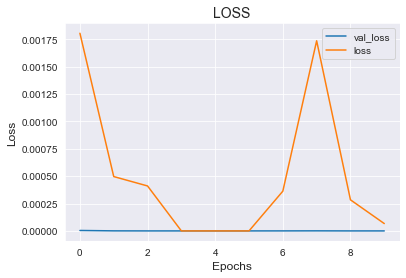

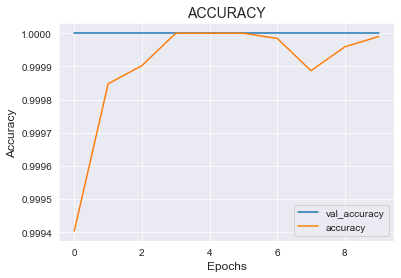

In [71]:
visualize_training_results(results1)

In [72]:
y_pred_m1 = model_1.predict(X_test)
y_pred_m1 =(y_pred_m1 > 0.5)

In [73]:

cm_m1 = confusion_matrix(y_test, y_pred_m1)
print(cm_m1)
print("------------------")
print(classification_report(y_test, y_pred_m1))

[[ 28337      0]
 [     0 233807]]
------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28337
           1       1.00      1.00      1.00    233807

    accuracy                           1.00    262144
   macro avg       1.00      1.00      1.00    262144
weighted avg       1.00      1.00      1.00    262144



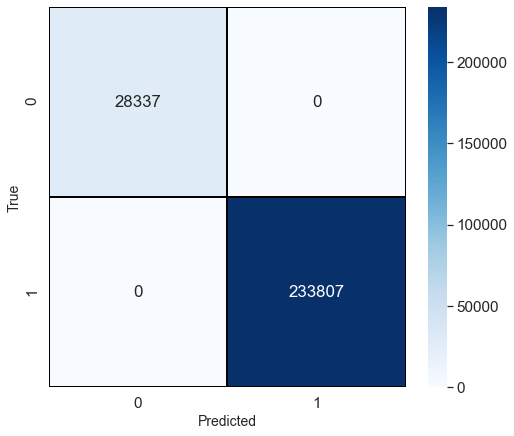

In [74]:
conf_matrix(cm_m1)